In [225]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.linalg import lstsq # for the multiple linear regression, we'll use the scipy linear algebra least-squares function
from scipy.interpolate import interp1d # for quantile regression, we'll want this 1d interpolation function
import matplotlib.pyplot as plt
%matplotlib inline

In [226]:

pip install xlrd==1.2.0

Note: you may need to restart the kernel to use updated packages.


Load in a csv file with snow water equivalent (SWE) measurements from two snow pillow sites (which measure the mass of snow) in California's Sierra Nevada. 

(If you're interested, [read about SWE and snow pillows here](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/null/?cid=nrcseprd1314833))

In [227]:
df = pd.read_excel('Comparison_WS_data.xlsx')




In [228]:
df.head(20)

,Academic_Year,School,Subgroup,Outcome,Cohort_Total,Grad_Rate,Count_Academic_Year,Percent_Total_AY
0,2011,Castlemont,All Students,GRADUATES MET A-G REQS,221,0.497738,64,0.289593
1,2011,Castlemont,All Students,GRADS NOT MEETING A-G,221,0.497738,46,0.208145
2,2011,Castlemont,All Students,SPEC ED CERT,221,0.497738,7,0.031674
3,2011,Castlemont,All Students,STILL ENROLL,221,0.497738,17,0.076923
4,2011,Castlemont,All Students,DROPOUT,221,0.497738,87,0.393665
5,2012,Castlemont,All Students,GRADUATES MET A-G REQS,176,0.613636,63,0.357955
6,2012,Castlemont,All Students,GRADS NOT MEETING A-G,176,0.613636,45,0.255682
7,2012,Castlemont,All Students,GED COMPLETER,176,0.613636,1,0.005682
8,2012,Castlemont,All Students,STILL ENROLL,176,0.613636,9,0.051136
9,2012,Castlemont,All Students,DROPOUT,176,0.613636,58,0.329545


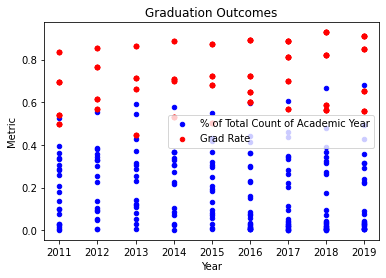

In [240]:
fig, ax = plt.subplots()

df.plot.scatter(x='Academic_Year', y='Percent_Total_AY', c='b', ax=ax, label='% of Total Count of Academic Year')

df.plot.scatter(x='Academic_Year', y='Grad_Rate', c='r', ax=ax, label='Grad Rate')

ax.set_title('Graduation Outcomes')
ax.set_xlabel('Year')
ax.set_ylabel('Metric');
plt.legend(loc="best")

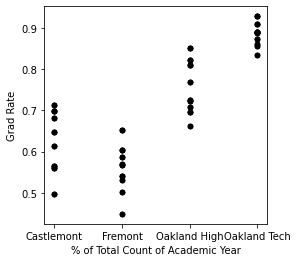

In [230]:
fig, ax = plt.subplots(figsize=(4,4))
df.plot.scatter(x='School', y='Grad_Rate', c='k', ax=ax);
ax.set_xlabel('% of Total Count of Academic Year')
ax.set_ylabel('Grad Rate');


In [268]:
xd=df.iloc[2:49]['Academic_Year']
yd=df.iloc[2:49]['Grad_Rate']

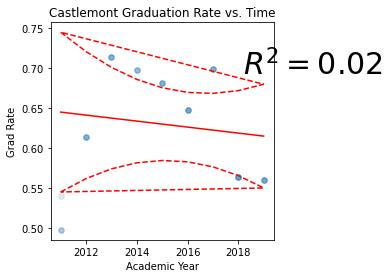

In [269]:



fig, ax = plt.subplots(figsize=(4,4))

plt.scatter(xd, yd, s=30, alpha=0.15, marker='o')

par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=30)

ax.set_title('Castlemont Graduation Rate vs. Time')
ax.set_xlabel('Academic Year')
ax.set_ylabel('Grad Rate');

# error bounds
yerr = [abs(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)]
par = np.polyfit(xd, yerr, 2, full=True)

yerrUpper = [(xx*slope+intercept)+(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]
yerrLower = [(xx*slope+intercept)-(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]

plt.plot(xl, yl, '-r')
plt.plot(xd, yerrLower, '--r')
plt.plot(xd, yerrUpper, '--r')
plt.show()




In [270]:
xd=df.iloc[50:94]['Academic_Year']
yd=df.iloc[50:94]['Grad_Rate']

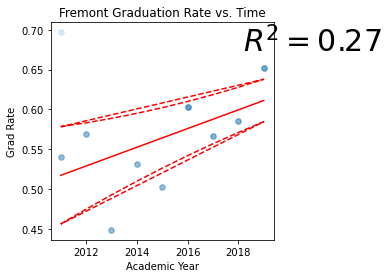

In [271]:
fig, ax = plt.subplots(figsize=(4,4))

plt.scatter(xd, yd, s=30, alpha=0.15, marker='o')

par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=30)

ax.set_title('Fremont Graduation Rate vs. Time')
ax.set_xlabel('Academic Year')
ax.set_ylabel('Grad Rate');

# error bounds
yerr = [abs(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)]
par = np.polyfit(xd, yerr, 2, full=True)

yerrUpper = [(xx*slope+intercept)+(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]
yerrLower = [(xx*slope+intercept)-(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]

plt.plot(xl, yl, '-r')
plt.plot(xd, yerrLower, '--r')
plt.plot(xd, yerrUpper, '--r')
plt.show()


In [273]:
xd=df.iloc[95:145]['Academic_Year']
yd=df.iloc[95:145]['Grad_Rate']

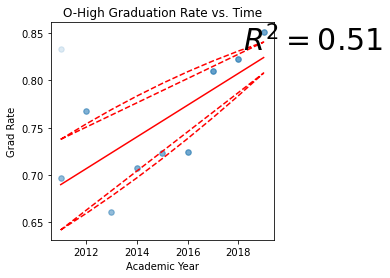

In [274]:
fig, ax = plt.subplots(figsize=(4,4))

plt.scatter(xd, yd, s=30, alpha=0.15, marker='o')

par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=30)

ax.set_title('O-High Graduation Rate vs. Time')
ax.set_xlabel('Academic Year')
ax.set_ylabel('Grad Rate');

# error bounds
yerr = [abs(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)]
par = np.polyfit(xd, yerr, 2, full=True)

yerrUpper = [(xx*slope+intercept)+(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]
yerrLower = [(xx*slope+intercept)-(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]

plt.plot(xl, yl, '-r')
plt.plot(xd, yerrLower, '--r')
plt.plot(xd, yerrUpper, '--r')
plt.show()

In [275]:
xd=df.iloc[146:195]['Academic_Year']
yd=df.iloc[146:195]['Grad_Rate']

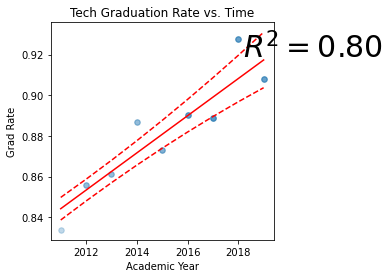

In [277]:
fig, ax = plt.subplots(figsize=(4,4))

plt.scatter(xd, yd, s=30, alpha=0.15, marker='o')

par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=30)

ax.set_title('Tech Graduation Rate vs. Time')
ax.set_xlabel('Academic Year')
ax.set_ylabel('Grad Rate');

# error bounds
yerr = [abs(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)]
par = np.polyfit(xd, yerr, 2, full=True)

yerrUpper = [(xx*slope+intercept)+(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]
yerrLower = [(xx*slope+intercept)-(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]

plt.plot(xl, yl, '-r')
plt.plot(xd, yerrLower, '--r')
plt.plot(xd, yerrUpper, '--r')
plt.show()

In [278]:
xd=df['Academic_Year']
yd=df['Grad_Rate']

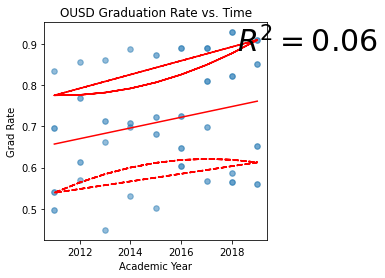

In [280]:
fig, ax = plt.subplots(figsize=(4,4))

plt.scatter(xd, yd, s=30, alpha=0.15, marker='o')

par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=30)

ax.set_title('OUSD Graduation Rate vs. Time')
ax.set_xlabel('Academic Year')
ax.set_ylabel('Grad Rate');

# error bounds
yerr = [abs(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)]
par = np.polyfit(xd, yerr, 2, full=True)

yerrUpper = [(xx*slope+intercept)+(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]
yerrLower = [(xx*slope+intercept)-(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]

plt.plot(xl, yl, '-r')
plt.plot(xd, yerrLower, '--r')
plt.plot(xd, yerrUpper, '--r')
plt.show()
